# Timelines mit Python pandas

In diesem Notebook wird eine Timeline der Einsätze der Amerikanischen 101st Ariborne Division im Zweiten Weltkrieg mit Hilfe einer Python pandas Series erstellt. Erfasst werden dabei die folgenden Ereignisse:

| Datum | Ereignis |
| :---  | :--- |
| 16. August 42 | In Dienst Stellung der Division |
| 6. Juni 44 | Landung in der Normandie (D-Day) |
| 17. September 44 | Operation Marketgarden |
| 16. Dezember 44 | Beginn Einsatz in den Ardennen |
| 24. Dezember 44 | Nuts! Brief |
| 28. April 45 | Befreiung von Kaufering |
| 30. November 45 | Ausser Dienst Stellung der Division |

Als erstes sind die erforderlichen Libraries zu importieren:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Aufbereiten der Daten

Es gibt verschiedene Möglichkeiten, die Daten in Python verfügbar zu machen. Bisher besprochen wurden Listen, Tupel und Dictionaries.

Das Ziel ist es allerdings, bereits vorhandene Daten ohne Abschreiben zu übernehmen. Deshalb steht [hier](data.csv) eine Datei mit den Daten der obigen Tabelle zur Verfügung.

In [9]:
timeline = pd.read_csv('data.csv',        # Pfad zur CSV-Datei
                       sep=';',           # Trennzeichen
                       index_col=0,       # Festlegen der Index-Spalte
                       parse_dates=[0],   # List Indices als Datum
                       quotechar="'",     # Definition Anführungszeichen
                       )
timeline

,Ereignis
Datum,
1942-08-16,In Dienststellung der Division
1944-06-06,D-Day
1944-09-17,Operation Marketgarden
1944-12-16,Beginn Einsatz in den Ardennen
1944-12-24,Nuts! Brief
1945-04-28,Befreiung von Kaufering
1945-11-30,Ausser Dienst Stellung der Division


## Erstellen der Grafik

Es gibt mehrere Python-Bibliotheken mit denen Daten in Python
visualisiert werden können. Eine der am weitesten verbreiteten ist
[matplotlib](https://matplotlib.org/).

Als erstes wird mit `plt.figure()` die 'Grundleinwand' für die Grafik erstellt.

In [10]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

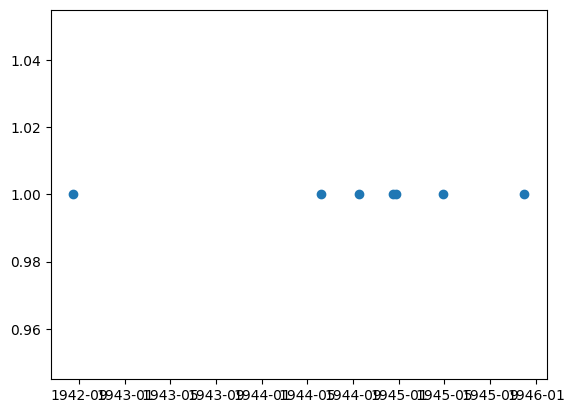

In [11]:
plt.figure()
plt.scatter(timeline.index, [1] * len(timeline))

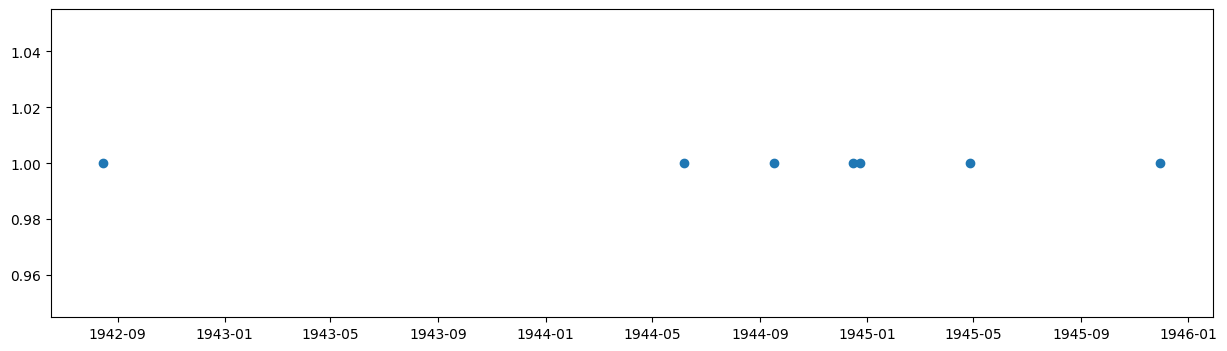

In [14]:
plt.figure(figsize=(15, 4))
plt.scatter(timeline.index, [1] * len(timeline))

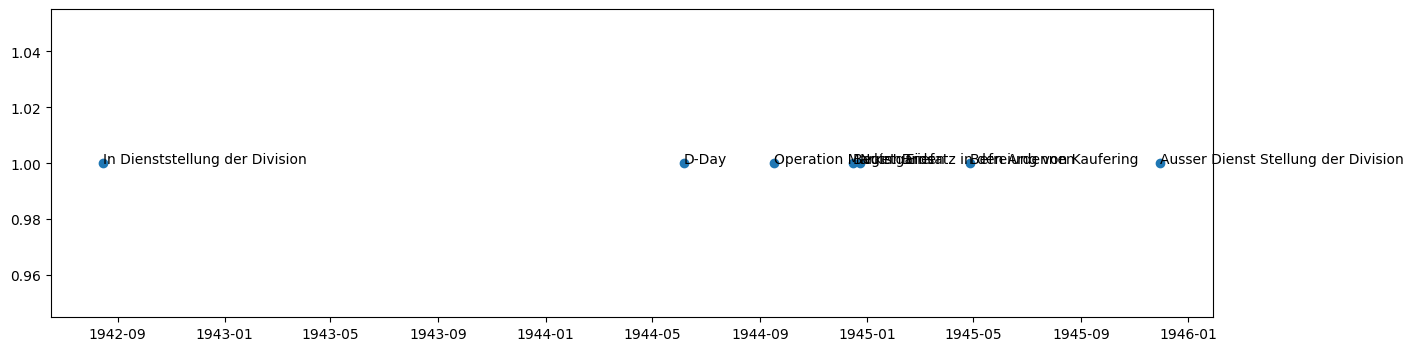

In [15]:
plt.figure(figsize=(15, 4))
plt.scatter(timeline.index, [1] * len(timeline))

for date, event in zip(timeline.index, timeline['Ereignis']):
    plt.annotate(event, (date, 1))

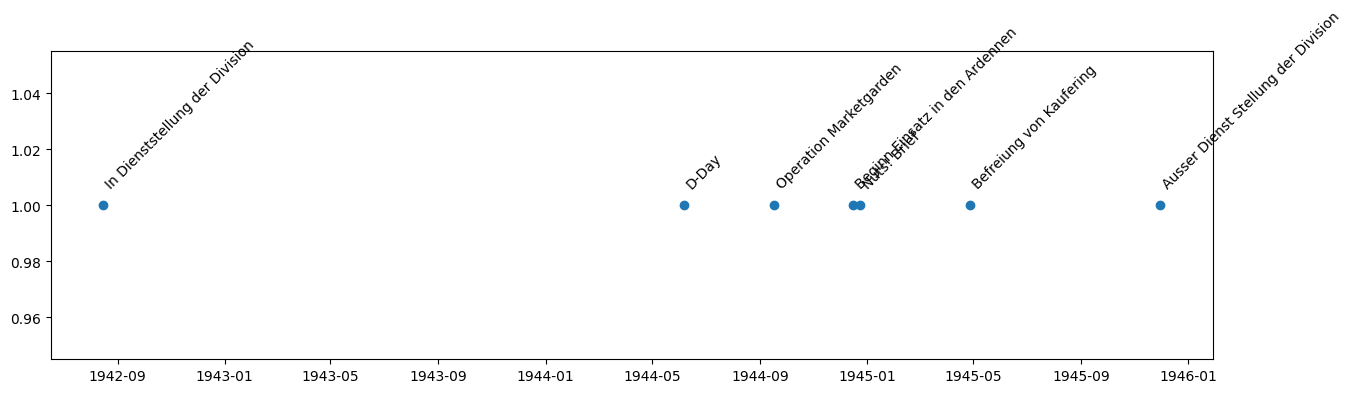

In [17]:
plt.figure(figsize=(15, 4))
plt.scatter(timeline.index, [1] * len(timeline))

for date, event in zip(timeline.index, timeline['Ereignis']):
    plt.annotate(event, (date, 1),
                 textcoords="offset points",
                 xytext=(0, 10), ha='left', va='bottom',
                 rotation=45)

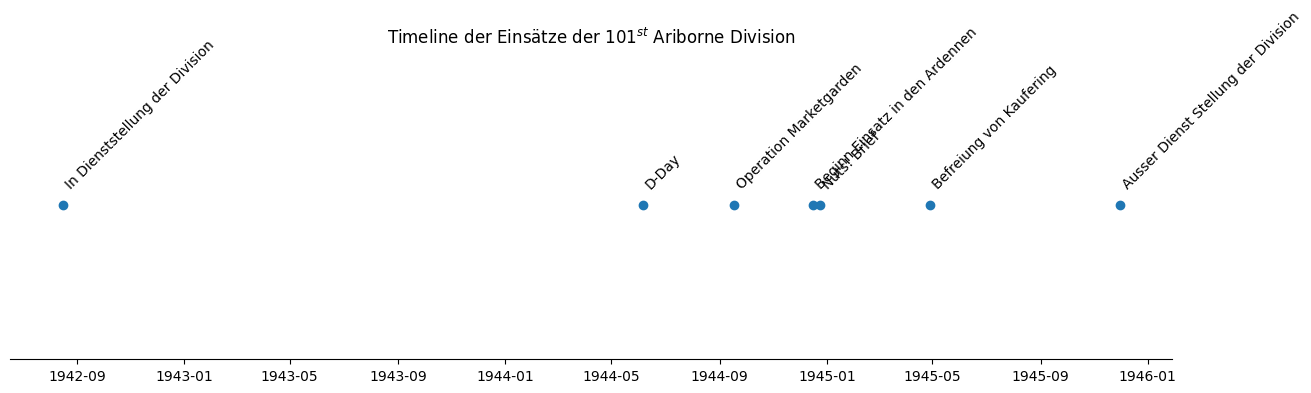

In [21]:
plt.figure(figsize=(15, 4))
plt.scatter(timeline.index, [1] * len(timeline))

for date, event in zip(timeline.index, timeline['Ereignis']):
    plt.annotate(event, (date, 1),
                 textcoords="offset points",
                 xytext=(0, 10), ha='left', va='bottom',
                 rotation=45)

plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.title('Timeline der Einsätze der 101$^{st}$ Ariborne Division')
plt.show()

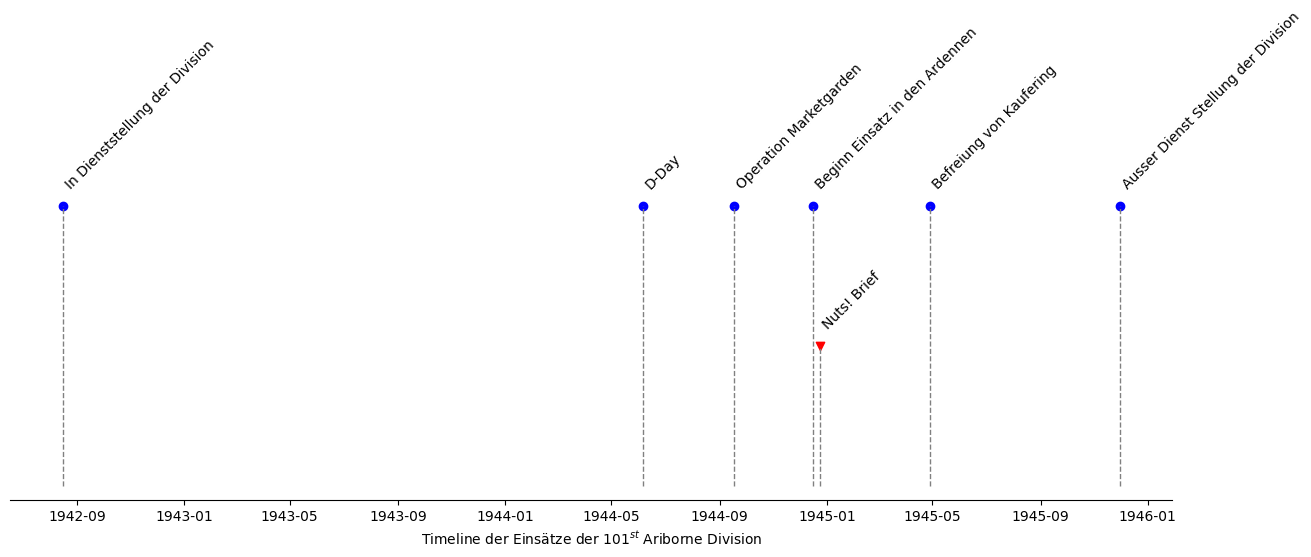

In [35]:
plt.figure(figsize=(15, 4))

nuts = pd.to_datetime('1944-12-24')

for date in timeline.index:
    if date == nuts:
        plt.scatter(date, 0.5, color='red', marker='v')
    else:
        plt.scatter(date, 1, color='blue')

for date, event in zip(timeline.index, timeline['Ereignis']):
    y_pos = 0.5 if date == nuts else 1
    plt.annotate(event, (date, y_pos),
                 textcoords="offset points",
                 xytext=(0, 10), ha='left', va='bottom',
                 rotation=45)
    plt.plot([date, date],
            [0, y_pos],
             color='gray',
             linestyle='--',
             linewidth=1,
             zorder=1)

plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.xlabel('Timeline der Einsätze der 101$^{st}$ Ariborne Division')
plt.savefig('timeline.svg',
            dpi=300)
plt.show()